#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [27]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [28]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [29]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [30]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [31]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [33]:
model = Sequential()

In [34]:
#卷積層1

In [35]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [36]:
model.add(Dropout(rate=0.25))

In [37]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [38]:
#卷積層2與池化層2

In [39]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [40]:
model.add(Dropout(0.25))

In [41]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [42]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [43]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [44]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [45]:
model.add(Dense(10, activation='softmax'))

In [46]:
#檢查model 的STACK
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

# 載入之前訓練的模型

In [47]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

def compile_model (loss_function) :
    model.compile(loss=loss_function, optimizer='sgd', metrics=['accuracy'])

    train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)
    
    show_train_history('accuracy','val_accuracy')
    
    scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
    print('accuracy=',scores[1])

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 40s 1ms/step - loss: 2.1439 - accuracy: 0.2122 - val_loss: 2.0254 - val_accuracy: 0.3220
Epoch 2/12
37500/37500 [==============================] - 40s 1ms/step - loss: 1.9197 - accuracy: 0.3152 - val_loss: 1.9219 - val_accuracy: 0.3573
Epoch 3/12
37500/37500 [==============================] - 41s 1ms/step - loss: 1.7822 - accuracy: 0.3734 - val_loss: 1.7880 - val_accuracy: 0.4111
Epoch 4/12
37500/37500 [==============================] - 41s 1ms/step - loss: 1.6879 - accuracy: 0.3979 - val_loss: 1.7048 - val_accuracy: 0.4388
Epoch 5/12
37500/37500 [==============================] - 40s 1ms/step - loss: 1.6131 - accuracy: 0.4218 - val_loss: 1.6328 - val_accuracy: 0.4575
Epoch 6/12
37500/37500 [==============================] - 40s 1ms/step - loss: 1.5478 - accuracy: 0.4443 - val_loss: 1.5877 - val_accuracy: 0.4707
Epoch 7/12
37500/37500 [==============================] - 40s 1ms/st

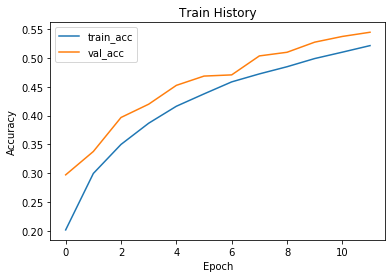

10000/10000 [==============================] - 3s 260us/step
accuracy= 0.5454999804496765


In [49]:
compile_model('categorical_crossentropy')

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 50s 1ms/step - loss: 0.0608 - accuracy: 0.5304 - val_loss: 0.0631 - val_accuracy: 0.5418
Epoch 2/12
37500/37500 [==============================] - 52s 1ms/step - loss: 0.0605 - accuracy: 0.5319 - val_loss: 0.0629 - val_accuracy: 0.5425
Epoch 3/12
37500/37500 [==============================] - 52s 1ms/step - loss: 0.0605 - accuracy: 0.5318 - val_loss: 0.0628 - val_accuracy: 0.5458
Epoch 4/12
37500/37500 [==============================] - 52s 1ms/step - loss: 0.0603 - accuracy: 0.5323 - val_loss: 0.0628 - val_accuracy: 0.5448
Epoch 5/12
37500/37500 [==============================] - 49s 1ms/step - loss: 0.0603 - accuracy: 0.5341 - val_loss: 0.0626 - val_accuracy: 0.5467
Epoch 6/12
37500/37500 [==============================] - 51s 1ms/step - loss: 0.0604 - accuracy: 0.5321 - val_loss: 0.0625 - val_accuracy: 0.5482
Epoch 7/12
37500/37500 [==============================] - 52s 1ms/st

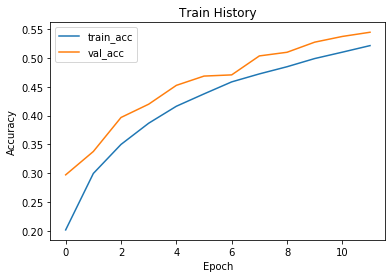

10000/10000 [==============================] - 3s 262us/step
accuracy= 0.5547000169754028


In [50]:
compile_model('mean_squared_error')

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 44s 1ms/step - loss: 0.2035 - accuracy: 0.9204 - val_loss: 0.2126 - val_accuracy: 0.9153
Epoch 2/12
37500/37500 [==============================] - 46s 1ms/step - loss: 0.2029 - accuracy: 0.9206 - val_loss: 0.2123 - val_accuracy: 0.9154
Epoch 3/12
37500/37500 [==============================] - 50s 1ms/step - loss: 0.2025 - accuracy: 0.9205 - val_loss: 0.2116 - val_accuracy: 0.9157
Epoch 4/12
37500/37500 [==============================] - 43s 1ms/step - loss: 0.2016 - accuracy: 0.9211 - val_loss: 0.2110 - val_accuracy: 0.9159
Epoch 5/12
37500/37500 [==============================] - 43s 1ms/step - loss: 0.2014 - accuracy: 0.9212 - val_loss: 0.2108 - val_accuracy: 0.9162
Epoch 6/12
37500/37500 [==============================] - 44s 1ms/step - loss: 0.2015 - accuracy: 0.9210 - val_loss: 0.2106 - val_accuracy: 0.9162
Epoch 7/12
37500/37500 [==============================] - 4899s 131m

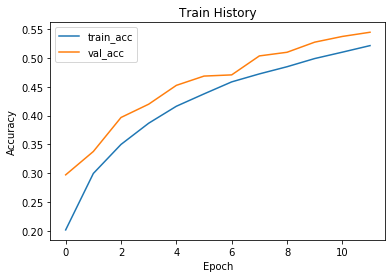

10000/10000 [==============================] - 3s 290us/step
accuracy= 0.9173599481582642


In [51]:
compile_model('binary_crossentropy')